Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Reading dataset

In [3]:
df=pd.read_csv('//Users/shankariseethalaksmimohanakrishnan/Documents/Data-science/artifacts/StudentsPerformance.csv')

Show top 5 records

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of dataset

In [7]:
df.shape

(1000, 8)

Checking missing values

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Checking for duplicates

In [10]:
df.duplicated().sum()

0

To check datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Determine number of unique values for each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Understanding the numberical variables

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Data Exploration

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df=df.rename({
                  'race/ethnicity':'race_ethnicity',
                  'parental level of education':'parental_level_of_education',
                  'test preparation course':'test_preparation_course',
                  'math score':'math_score',
                  'reading score':'reading_score',
                  'writing score':'writing_score'
                 },
                 axis='columns')

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Determine unique values for each categorical column

In [18]:
print("unique values in gender column", end=" ")
print(df.gender.unique())
print("unique values in race/ethinicity column", end=" ")
print(df.race_ethnicity.unique())
print("unique values in parental level of education column", end=" ")
print(df['parental_level_of_education'].unique())
print("unique values in lunch column", end=" ")
print(df['lunch'].unique())
print('unique values of test preperation course', end=" ")
print(df['test_preparation_course'].unique())

unique values in gender column ['female' 'male']
unique values in race/ethinicity column ['group B' 'group C' 'group A' 'group D' 'group E']
unique values in parental level of education column ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in lunch column ['standard' 'free/reduced']
unique values of test preperation course ['none' 'completed']


In [19]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

Categorical and Numerical Column List

In [22]:
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
print(f"categorical columns are {categorical_columns}")
print(f"Numerical columns are {numeric_columns}")

categorical columns are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numerical columns are ['math_score', 'reading_score', 'writing_score']


Adding columns total score and average score

In [23]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df.total_score/3

In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Count of students having full marks in each subject

In [27]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Students who have failed. marks < 40

In [32]:
reading_retry = df[df['reading_score'] < 40]['total_score'].count()
writing_retry = df[df['writing_score'] < 40]['total_score'].count()
math_retry = df[df['math_score'] < 40]['total_score'].count()

print(f'Number of students failed in Maths: {math_retry}')
print(f'Number of students failed in Writing: {writing_retry}')
print(f'Number of students failed in Reading: {reading_retry}')

Number of students failed in Maths: 40
Number of students failed in Writing: 32
Number of students failed in Reading: 26


# Data Visualization

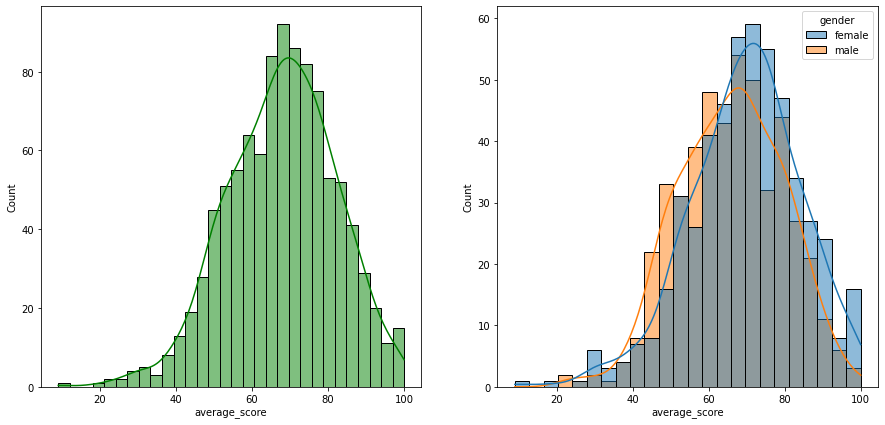

In [34]:
fig,axs = plt.subplots(1,2,figsize=(15,7)) 
#subplots(1,2)=> row=1 and column=2 => 2 figures side by side
#figsize=(15,7) => overall size of the figure is 15 inches 
#fig is overall figure
#axs is sub figures 
plt.subplot(121) 
#121
#row->1
#column->2
#index->1
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
#122
#row->1
#column->2
#index->2
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


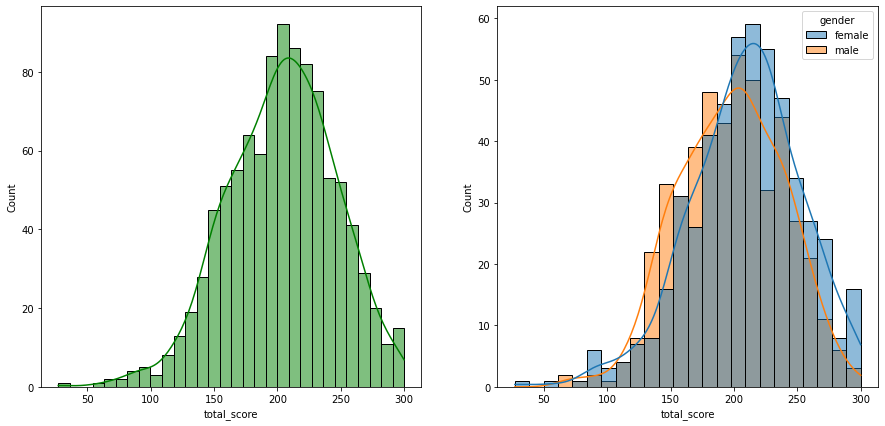

In [36]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()


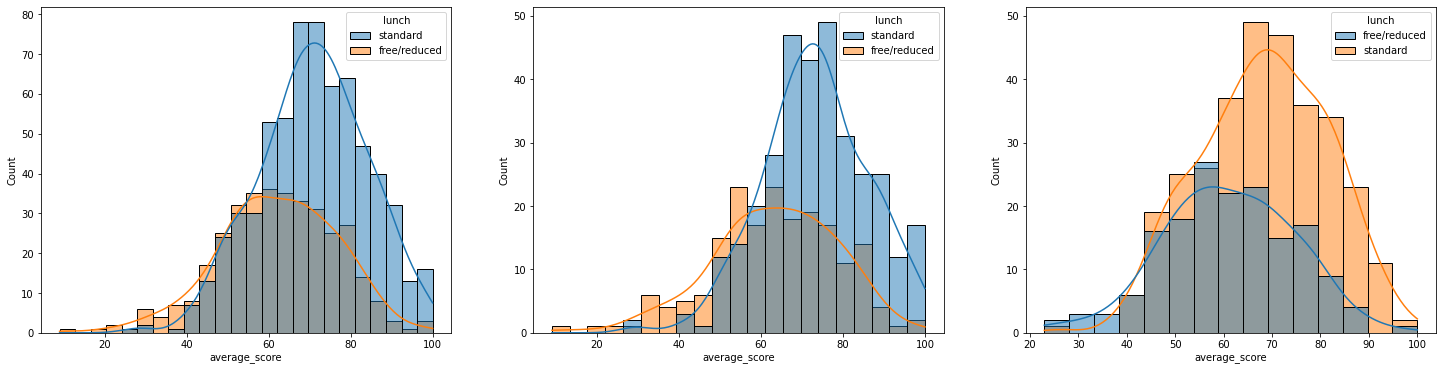

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

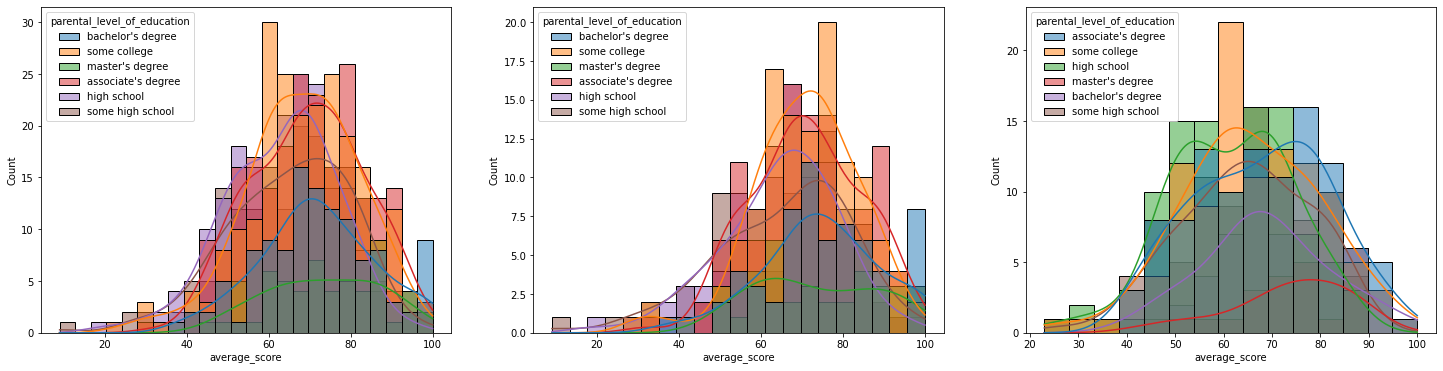

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

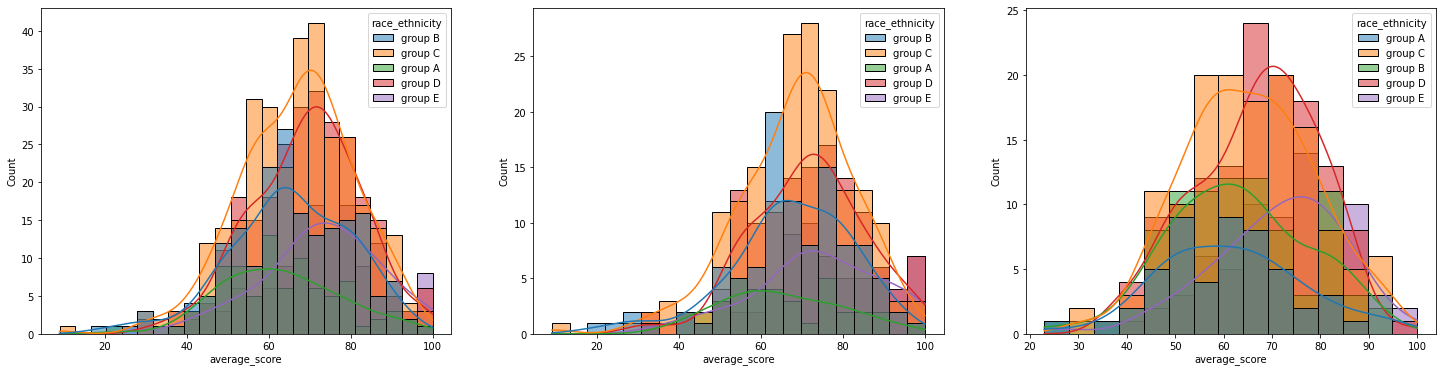

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()